Leitura das Bases

In [1]:
# Importando bibliotecas padroes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca padrao para trabalhar com datas
from datetime import datetime

# Importando bibliotecas para fazer graficos
import plotly.express as px
import plotly.graph_objects as go

# Instalacao e importacao da biblioteca de previsao temporal
# >pip install pmdarima
from pmdarima.arima import auto_arima

# Importando biblioteca para calcular o erro MAPE
from sklearn.metrics import mean_absolute_percentage_error

# Decomposicao de serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose

# Importando o Prophet para previsao (Meta)
from prophet import Prophet

c:\Users\Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Leitura do arquivo de dados, ja importando as colunas "ObservationDate" e "Last Update" em formato de data

In [2]:
df_covid = pd.read_csv('covid_19_data.csv', parse_dates=['ObservationDate', 'Last Update'])

# Olhando as primeiras linhas:
df_covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Olhando algumas infos como o tipo de cada coluna e dados NULOS

In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   228326 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  object        
 5   Confirmed        306429 non-null  float64       
 6   Deaths           306429 non-null  float64       
 7   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 18.7+ MB


Analise de dados - Apenas dados do BRASIL

In [4]:
df_covid_brasil = df_covid[df_covid['Country/Region'] == 'Brazil']

df_covid_brasil.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
84,85,2020-01-23,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2525,2526,2020-02-26,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0


In [5]:
# Olhando algumas informacoes como o tipo de cada coluna e dados nulos
df_covid_brasil.info()
# Vemos que temos alguns dados faltantes no estado

<class 'pandas.core.frame.DataFrame'>
Index: 10229 entries, 84 to 306342
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              10229 non-null  int64         
 1   ObservationDate  10229 non-null  datetime64[ns]
 2   Province/State   10144 non-null  object        
 3   Country/Region   10229 non-null  object        
 4   Last Update      10229 non-null  object        
 5   Confirmed        10229 non-null  float64       
 6   Deaths           10229 non-null  float64       
 7   Recovered        10229 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 719.2+ KB


In [6]:
# Olhando a quantidade de dados por estado
df_covid_brasil['Province/State'].value_counts().sort_values(ascending=False)

# Vemos que os dados estao bem distribuidos entre os estados

Province/State
Acre                   375
Alagoas                375
Amapa                  375
Amazonas               375
Bahia                  375
Ceara                  375
Distrito Federal       375
Espirito Santo         375
Goias                  375
Maranhao               375
Mato Grosso            375
Mato Grosso do Sul     375
Minas Gerais           375
Para                   375
Paraiba                375
Parana                 375
Pernambuco             375
Piaui                  375
Rio Grande do Norte    375
Rio Grande do Sul      375
Rio de Janeiro         375
Rondonia               375
Roraima                375
Santa Catarina         375
Sao Paulo              375
Sergipe                375
Tocantins              375
Unknown                 19
Name: count, dtype: int64

In [7]:
# Olhando os casos por estado em porcentagem
casos_por_estado = df_covid_brasil.groupby(['Province/State'])['Confirmed'].sum().sort_values(ascending=False)

porcentagem_casos = (casos_por_estado / casos_por_estado.sum()) * 100
porcentagem_casos

Province/State
Sao Paulo              19.677267
Minas Gerais            7.781710
Bahia                   6.292592
Santa Catarina          5.706810
Rio Grande do Sul       5.651953
Parana                  5.518144
Rio de Janeiro          5.491009
Ceara                   4.656896
Para                    3.842455
Goias                   3.815334
Distrito Federal        3.083928
Espirito Santo          3.014765
Pernambuco              2.922144
Amazonas                2.843366
Maranhao                2.529401
Mato Grosso             2.379156
Paraiba                 2.203156
Piaui                   1.756913
Mato Grosso do Sul      1.603017
Rio Grande do Norte     1.550863
Sergipe                 1.485548
Alagoas                 1.405116
Rondonia                1.384574
Tocantins               1.146542
Amapa                   0.868085
Roraima                 0.826934
Acre                    0.562324
Unknown                 0.000000
Name: Confirmed, dtype: float64

Celula anterior em grafico

<Axes: xlabel='Province/State'>

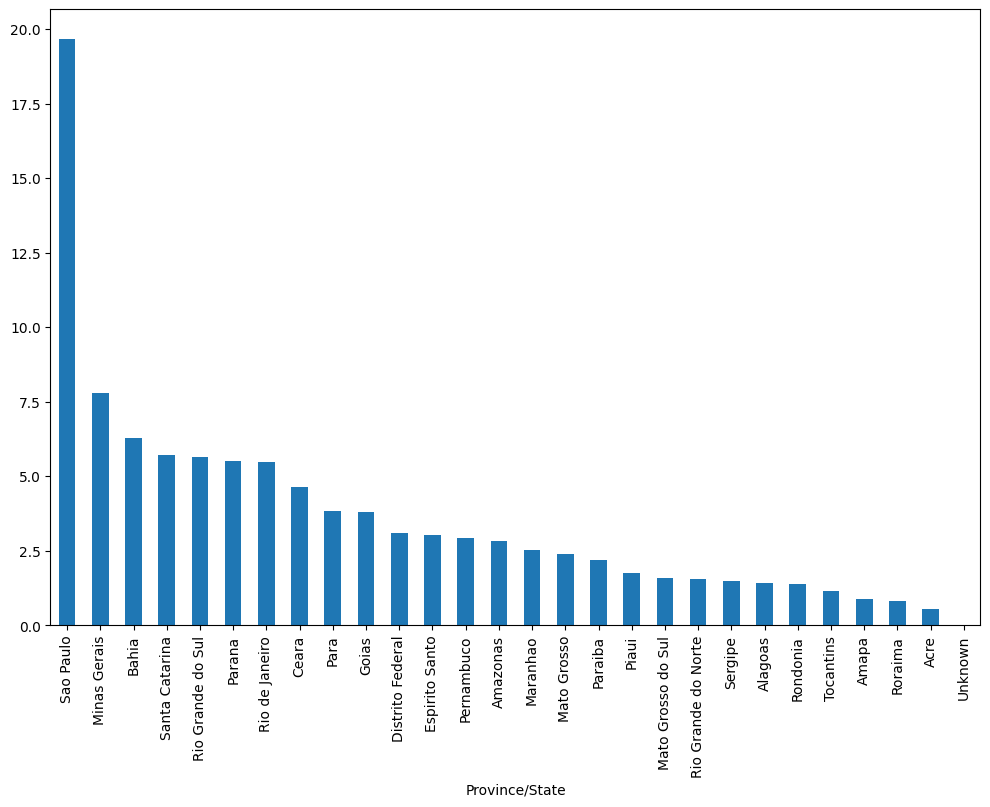

In [8]:
porcentagem_casos.plot(kind='bar', figsize=(12, 8))

Olhando a quantidade em porcentagem de casos mortes por estado

In [9]:
mortes_por_estado = df_covid_brasil.groupby(['Province/State'])['Deaths'].sum().sort_values(ascending=False)

porcentagem_mortes = (mortes_por_estado / mortes_por_estado.sum()) * 100
[porcentagem_mortes]

[Province/State
 Sao Paulo              23.969900
 Rio de Janeiro         12.502505
 Minas Gerais            6.592132
 Ceara                   5.278705
 Rio Grande do Sul       4.728271
 Pernambuco              4.686563
 Bahia                   4.538343
 Parana                  4.306565
 Para                    3.906764
 Amazonas                3.348202
 Goias                   3.315624
 Santa Catarina          2.670362
 Espirito Santo          2.462798
 Mato Grosso             2.255222
 Maranhao                2.216567
 Distrito Federal        1.972534
 Paraiba                 1.803958
 Rio Grande do Norte     1.495005
 Piaui                   1.353582
 Alagoas                 1.246956
 Sergipe                 1.214266
 Mato Grosso do Sul      1.154250
 Rondonia                1.083896
 Tocantins               0.609332
 Amapa                   0.454678
 Acre                    0.416953
 Roraima                 0.416067
 Unknown                 0.000000
 Name: Deaths, dtype: float64]

Analise Grafica Mortes por Covid por Estado Brasileiro

<Axes: xlabel='Province/State'>

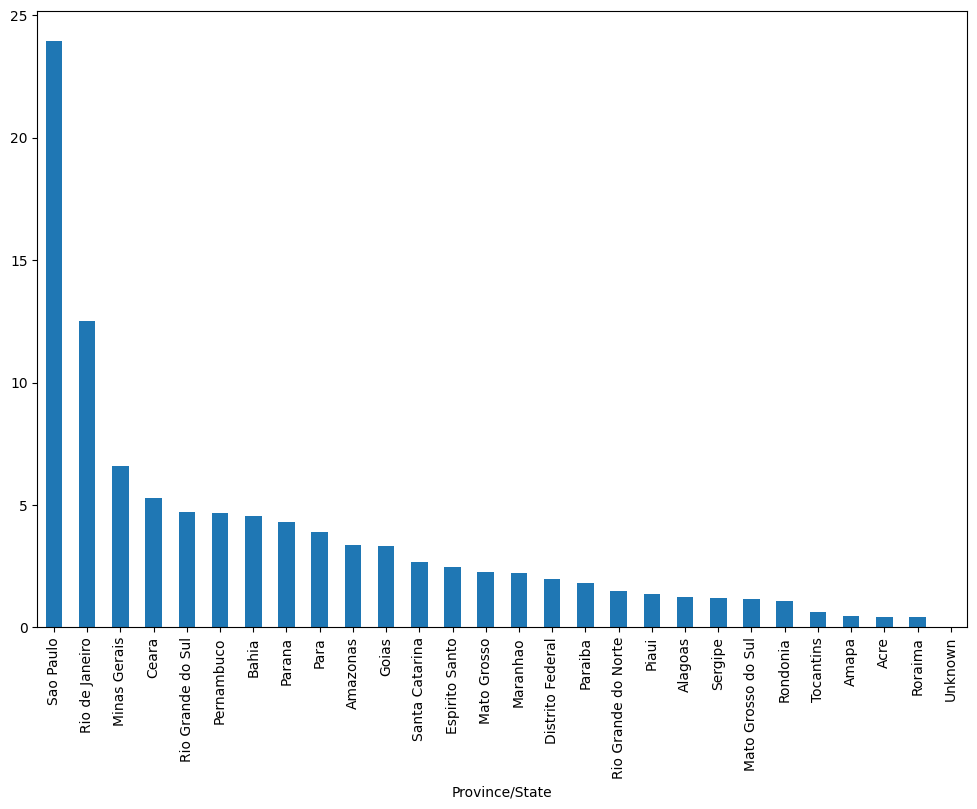

In [10]:
porcentagem_mortes.plot(kind='bar', figsize=(12,8))

In [11]:
#  Chama a atenção que o RJ, Ceara, Amazonas possuem um número elevado de mortes
#  comparada com sua população e que SC, ES, DF, Rondonia, Amapa, Roraima possuem
#  um número elevado de casos comparada com sua população.

Taxa de Morte por Estado

In [12]:
tx_morte = ((mortes_por_estado / casos_por_estado)*100).sort_values(ascending=False)
tx_morte
# RJ se destaca com o maior numero de pessoas infectadas que morrem por Covid

Province/State
Rio de Janeiro         6.217090
Pernambuco             4.379204
Sao Paulo              3.326164
Amazonas               3.215298
Ceara                  3.095089
Para                   2.776199
Rio Grande do Norte    2.632155
Mato Grosso            2.588265
Alagoas                2.423156
Maranhao               2.392794
Goias                  2.372876
Minas Gerais           2.313093
Rio Grande do Sul      2.284263
Paraiba                2.235752
Sergipe                2.231872
Espirito Santo         2.230579
Rondonia               2.137539
Parana                 2.130984
Piaui                  2.103665
Acre                   2.024620
Bahia                  1.969292
Mato Grosso do Sul     1.966093
Distrito Federal       1.746476
Tocantins              1.451131
Amapa                  1.430160
Roraima                1.373837
Santa Catarina         1.277671
Unknown                     NaN
dtype: float64

Taxa de Recuperacao por Estado BR

In [13]:
recupera_por_estado = df_covid_brasil.groupby(['Province/State'])['Recovered'].sum().sort_values(ascending=False)

tx_recupera = ((recupera_por_estado / casos_por_estado) * 100).sort_values(ascending=False)


<Axes: xlabel='Province/State'>

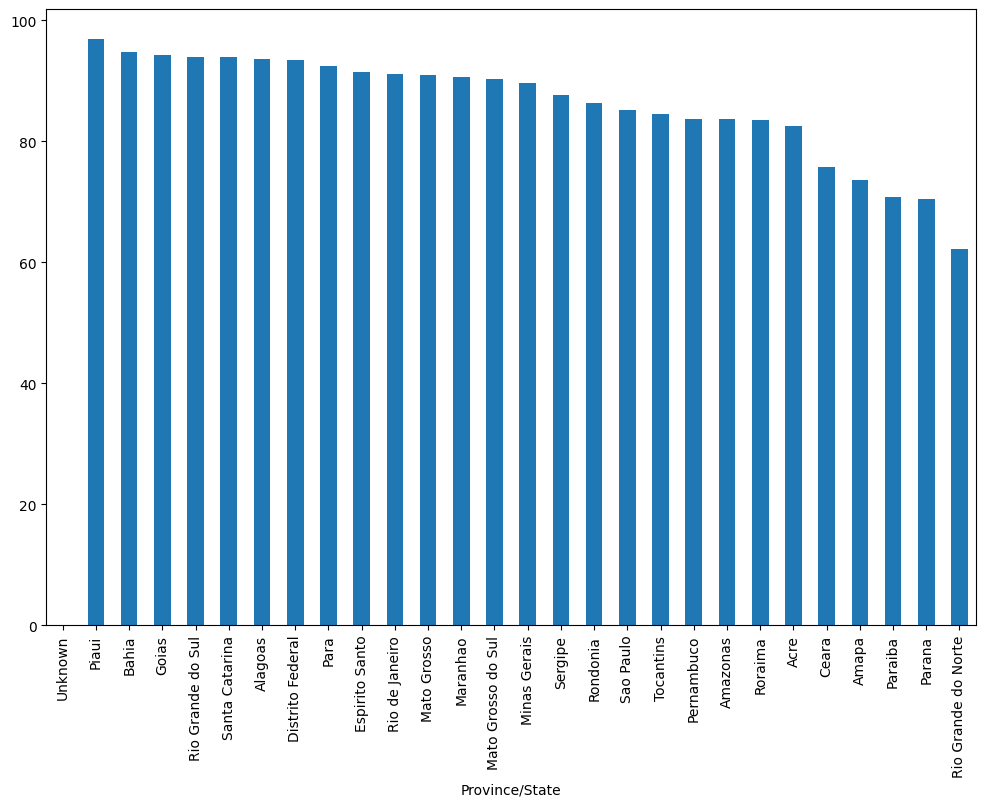

In [14]:
# Olhando os dados da celula anterior no formato em grafico
tx_recupera.plot(kind='bar', figsize=(12, 8))

In [15]:
# Vamos ver os casos ativos por estado
casos_ativos = (casos_por_estado - mortes_por_estado - recupera_por_estado).sort_values(ascending=False)
# Observa-se que muitas mortes e recuperacoes foram registradas como 'Unknown', por isso esta como negativo
casos_ativos

Province/State
Sao Paulo              59781663.0
Parana                 40117440.0
Ceara                  26167177.0
Minas Gerais           16463202.0
Paraiba                15749929.0
Rio Grande do Norte    14429817.0
Amazonas                9894544.0
Pernambuco              9210251.0
Santa Catarina          7170912.0
Amapa                   5730086.0
Rio Grande do Sul       5534037.0
Bahia                   5449133.0
Espirito Santo          5084041.0
Para                    4901771.0
Maranhao                4649065.0
Tocantins               4245664.0
Rondonia                4214311.0
Mato Grosso             4044404.0
Sergipe                 3992926.0
Distrito Federal        3955992.0
Rio de Janeiro          3758720.0
Roraima                 3324195.0
Goias                   3313455.0
Mato Grosso do Sul      3261674.0
Acre                    2288074.0
Alagoas                 1481963.0
Piaui                    429169.0
Unknown                -3680510.0
dtype: float64

<Axes: xlabel='Province/State'>

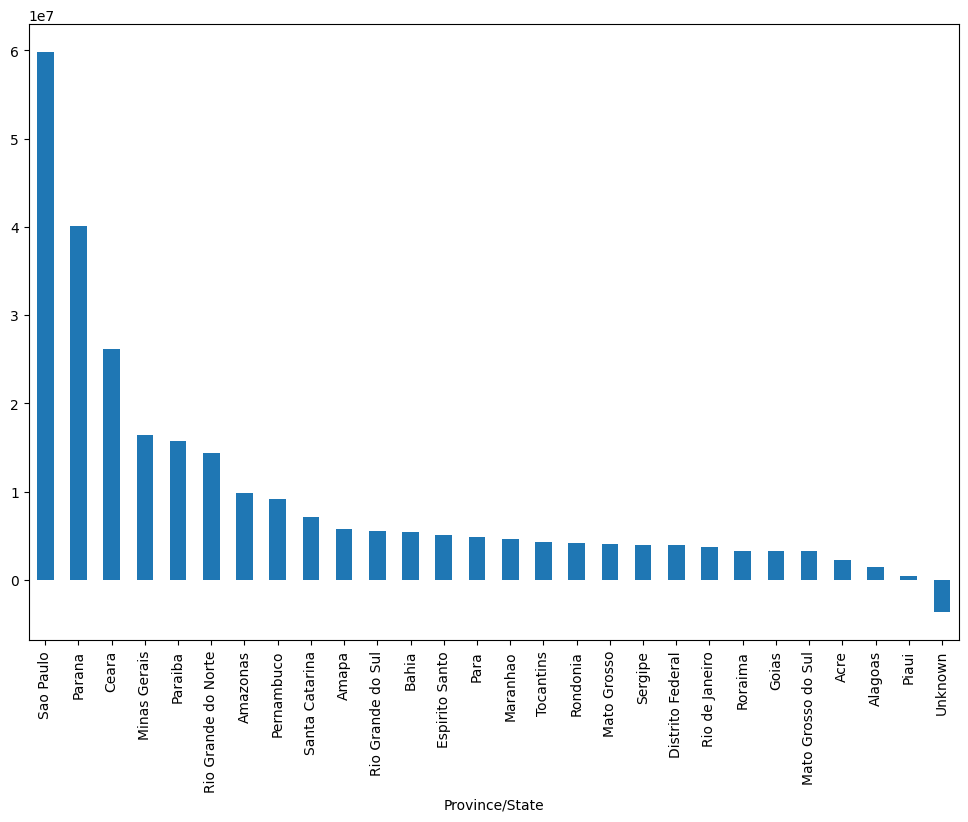

In [16]:
# Olhando os dados da celula anterior no formato de grafico
casos_ativos.plot(kind='bar', figsize=(12, 8))

Agregando os valores de casos confirmados, recuperados e mortes

In [17]:
df_brasil_casos = df_covid_brasil.groupby(['ObservationDate']).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})

df_brasil_casos

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-23,0.0,0.0,0.0
2020-02-26,1.0,0.0,0.0
2020-02-27,1.0,0.0,0.0
2020-02-28,1.0,0.0,0.0
2020-02-29,2.0,0.0,0.0
...,...,...,...
2021-05-25,16194209.0,14231991.0,452031.0
2021-05-26,16274695.0,14272174.0,454429.0
2021-05-27,16342162.0,14455810.0,456674.0


Plotando agora o grafico de casos confirmados, recuperados e mortes ao longo do tempo

In [18]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_brasil_casos.index, y=df_brasil_casos['Confirmed'], name='Confirmados'))

fig.add_trace(go.Scatter(x=df_brasil_casos.index, y=df_brasil_casos['Recovered'], name='Recuperados'))

fig.add_trace(go.Scatter(x=df_brasil_casos.index, y=df_brasil_casos['Deaths'], name='Mortes'))

fig.update_layout(title='Casos de Covid-19',
                  xaxis_title='data',
                  yaxis_title='Numero de casos')

### Numero Total de Pessoas Infectadas pelo COVID-19 no Mundo

In [19]:
df_covid.describe()

,SNo,ObservationDate,Confirmed,Deaths,Recovered
count,306429.000000,306429,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,2020-11-06 01:54:54.146441728,8.567091e+04,2036.403268,5.042029e+04
min,1.000000,2020-01-22 00:00:00,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,2020-07-30 00:00:00,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,2020-11-10 00:00:00,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,2021-02-18 00:00:00,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,2021-05-29 00:00:00,5.863138e+06,112385.000000,6.399531e+06
std,88458.577156,NaN,2.775516e+05,6410.938048,2.015124e+05


Taxa de Crescimento Medio em intervalos regulares

In [20]:
# Vamos usar então essa segunda fómermula para calcular a taxa de crescimento
# Vamos plotar o gráfico da taxa de crescimento de casos confirmados
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_brasil_casos.index, y=(df_brasil_casos["Confirmed"] - df_brasil_casos["Confirmed"].shift())/df_brasil_casos["Confirmed"].shift()),
)
fig.update_layout(title='taxa de crescimento de casos confirmados',
                   xaxis_title='data',
                   yaxis_title='taxa de crescimento')
fig.show()

In [21]:
# Assim podemos calcular a taxa de crescimento médio
media_diaria = ((df_brasil_casos["Confirmed"]- df_brasil_casos["Confirmed"].shift())/df_brasil_casos["Confirmed"].shift())

df_filter = media_diaria.isin([np.nan, np.inf, -np.inf]) 
  
media_diaria = media_diaria[~df_filter] 
  
media_diaria.dropna(inplace=True) 

media_diaria.mean()

0.04414091343479946

In [22]:
# Agora podemos fazer o mesmo e calcular para quem se recuperou
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_brasil_casos.index, y=(df_brasil_casos["Recovered"]- df_brasil_casos["Recovered"].shift())/df_brasil_casos["Recovered"].shift()),
)
fig.update_layout(title='taxa de crescimento de casos recuperados',
                   xaxis_title='data',
                   yaxis_title='taxa de crescimento')
fig.show()

### Prevendo o numero de casos no proximo mes com ARIMA

In [23]:
# Dividir entre Treino e Teste
treino = df_brasil_casos['2020-02-26':'2021-04-30']
teste = df_brasil_casos['2021-05-01':]

In [24]:
treino

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-02-26,1.0,0.0,0.0
2020-02-27,1.0,0.0,0.0
2020-02-28,1.0,0.0,0.0
2020-02-29,2.0,0.0,0.0
2020-03-01,2.0,0.0,0.0
...,...,...,...
2021-04-26,14369423.0,12707500.0,391936.0
2021-04-27,14441563.0,12815119.0,395022.0
2021-04-28,14521289.0,12849663.0,398185.0


In [25]:
# Selecionando apenas a coluna Confirmados para fazermos a previsao de casos confirmados
treino_previsao = treino['Confirmed']
teste_previsao = teste['Confirmed']
previsao_teste_treino = pd.concat([treino_previsao, teste_previsao], axis=0)

In [26]:
previsao_teste_treino.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 459 entries, 2020-02-26 to 2021-05-29
Series name: Confirmed
Non-Null Count  Dtype  
--------------  -----  
459 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [27]:
treino_previsao.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 430 entries, 2020-02-26 to 2021-04-30
Series name: Confirmed
Non-Null Count  Dtype  
--------------  -----  
430 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB


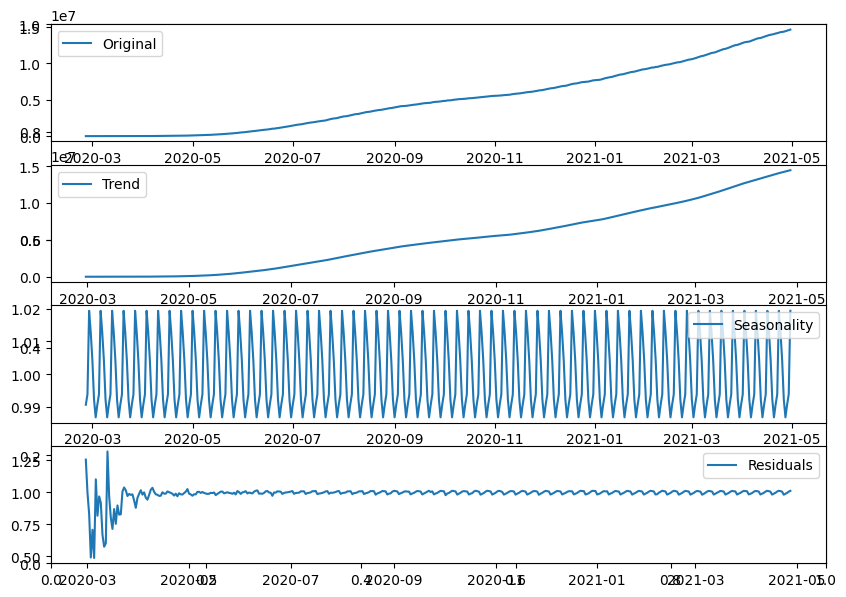

In [28]:
# Vamos ver a tendencia, a sazonalidade e o residuo dos dados de treino de casos confirmados
decomposition = seasonal_decompose(treino_previsao, model='multiplicative')

# definicao dos componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plots
plt.subplots(figsize=(10, 7))
plt.subplot(411)
plt.plot(treino_previsao, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

In [29]:
# Aplicando auto_arima para sabermos os melhores parametros
model = auto_arima(treino_previsao,
                   method='nm',
                   max_D=2,
                   stepwise=True,
                   maxiter=50,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=9585.647, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=9578.166, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=9544.554, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=9449.348, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=9423.659, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=9560.325, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=9549.123, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=9516.265, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=9536.861, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=9422.871, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=9448.750, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=9546.490, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=9583.285, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=9551.827, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept

In [30]:
# Aplicando os melhores parametros para o modelo em questao
model.fit(treino_previsao)

ARIMA(method='nm', order=(1, 2, 1), scoring_args={}, suppress_warnings=True)

In [31]:
# Fazendo previsao para proximos 29 dias que sao os dados do mes de Maio que temos
previsao = model.predict(n_periods=29)

In [32]:
# Transformando a previsao em DataFrame
previsao = pd.DataFrame(previsao, index=teste.index, columns=['previsao'])
previsao

,previsao
ObservationDate,
2021-05-01,1.472535e+07
2021-05-02,1.479124e+07
2021-05-03,1.485711e+07
2021-05-04,1.492306e+07
2021-05-05,1.498914e+07
2021-05-06,1.505535e+07
2021-05-07,1.512169e+07
2021-05-08,1.518817e+07
2021-05-09,1.525478e+07


<Figure size 2000x500 with 0 Axes>

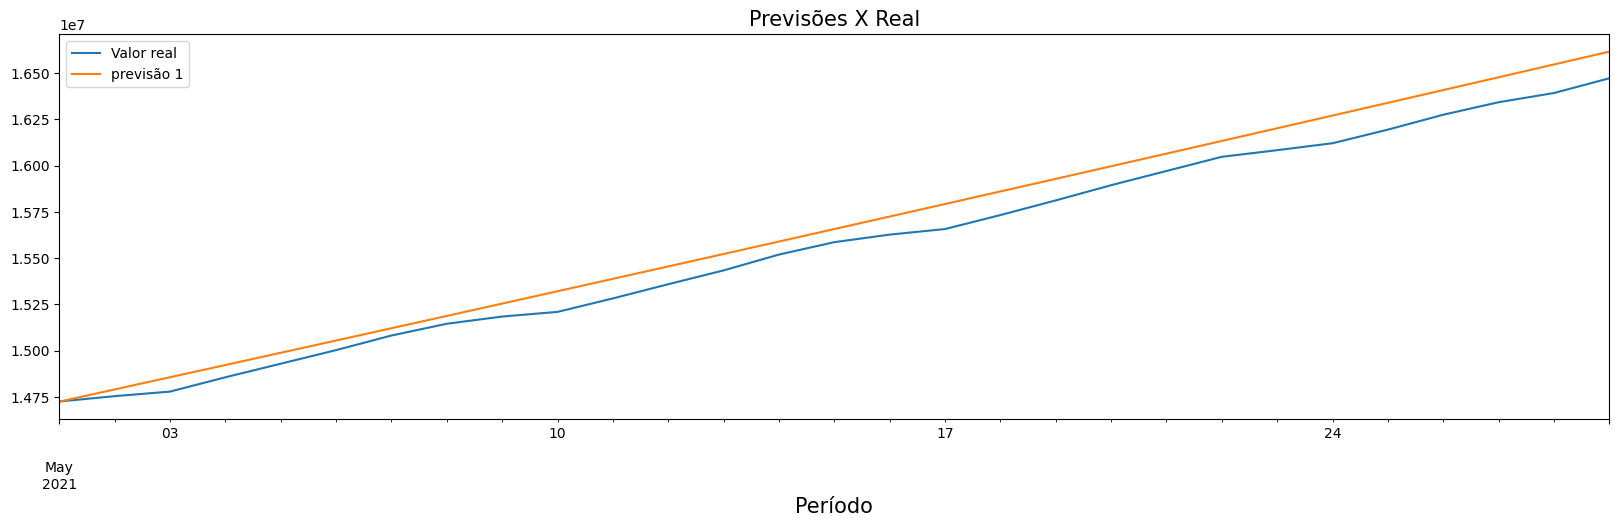

In [33]:
# Vamos ver no gráfico se o valor encontrado é parecido com o valor real
plt.figure(figsize=(20,5))
pd.concat([teste_previsao,previsao],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.xlabel("Período", size=15)
plt.legend(['Valor real','previsão 1']);

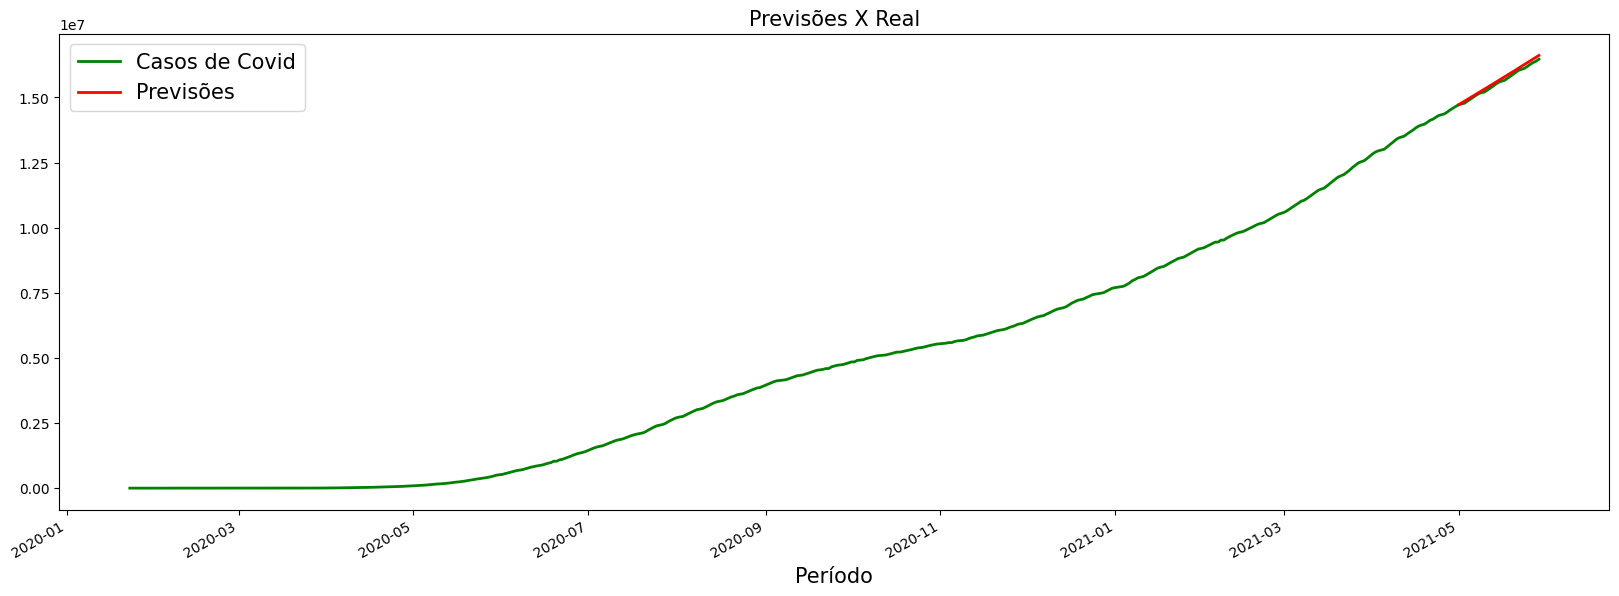

In [34]:
# Olhando para a mesma coisa, mas observando toda a janela de tempo
pd.concat([df_brasil_casos['Confirmed'],previsao],
          axis=1).plot(linewidth=2,
                       figsize=(20,7),
                       color=['g','r'])
plt.legend(['Casos de Covid','Previsões'], fontsize=15)
plt.xlabel('Período', size=15)
plt.title('Previsões X Real',size=15)
plt.show();

In [35]:
# Vendo o valor de erro -> MAPE

mean_absolute_percentage_error(teste_previsao, previsao)

0.005967400263522028

In [36]:
# Agora que testamos o modelo e o erro consideramos aceitável podemos aplicar para os dados futuros
model.fit(previsao_teste_treino)

previsao2=model.predict(n_periods=33)
previsao2=pd.DataFrame(previsao2, 
                      index=pd.date_range(start='2021-06-01',end='2021-07-01', freq='D'),
                      columns=['nova previsão'])
previsao2

,nova previsão
2021-06-01,1.667749e+07
2021-06-02,1.674485e+07
2021-06-03,1.681230e+07
2021-06-04,1.687990e+07
2021-06-05,1.694765e+07
2021-06-06,1.701556e+07
2021-06-07,1.708363e+07
2021-06-08,1.715186e+07
2021-06-09,1.722025e+07
2021-06-10,1.728880e+07


<Figure size 2000x500 with 0 Axes>

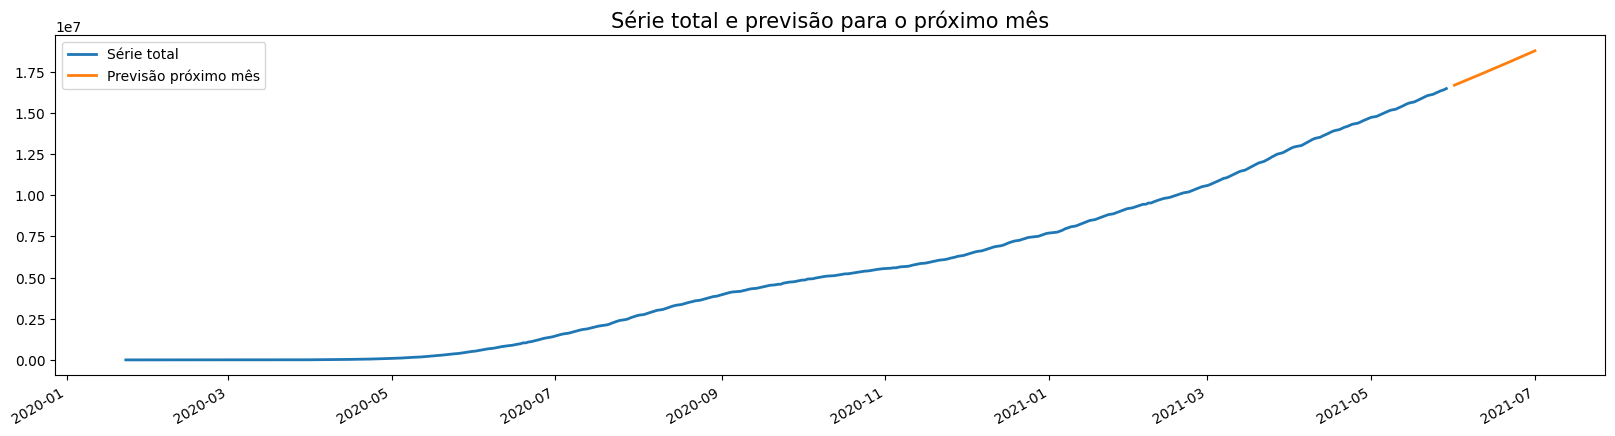

In [37]:
# PLotando o gráfico para vermos a previsão
plt.figure(figsize=(20,5))
pd.concat([df_brasil_casos['Confirmed'],previsao2],axis=1).plot(figsize=(20,5), linewidth=2)
plt.xlabel('')
plt.title('Série total e previsão para o próximo mês',size=15)
plt.legend(['Série total','Previsão próximo mês'])
plt.show();

### Prevendo Numero de Casos de Covid-19 do Proximo Mes com Prophet

In [38]:
# Devemos renomear as colunas pois o algoritmo do Prophet entende se estiver a coluna data nomeada como 'ds', e o valor que se deseja prever como "y"
treino_prophet =treino_previsao.reset_index()
treino_prophet = treino_prophet.rename(columns={'ObservationDate' : 'ds', 'Confirmed': 'y'})

teste_prophet = teste_previsao.reset_index()
teste_prophet = teste_prophet.rename(columns={'ObservationDate' : 'ds', 'Confirmed': 'y'})

prophet_teste_treino = pd.concat([treino_prophet,teste_prophet],axis=0)

In [39]:
# Criando o modelo
modelo = Prophet()

# Ajustando o modelo aos dados
modelo.fit(treino_prophet)

# Criando dataframe com os períodos futuros para as previsões, vamos fazer a previsão para os próximos 30 dias
futuro = modelo.make_future_dataframe(periods= 30, freq = '1d')

# Realizando as previsões
previsao= modelo.predict(futuro)

# Agora podemos ver a nossa previsão
previsao.head()

09:24:45 - cmdstanpy - INFO - Chain [1] start processing
09:24:45 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-26,-9603.044811,-85110.648752,57222.579083,-9603.044811,-9603.044811,-1843.414439,-1843.414439,-1843.414439,-1843.414439,-1843.414439,-1843.414439,0.0,0.0,0.0,-11446.459250
1,2020-02-27,-9028.989056,-73785.835130,69618.847868,-9028.989056,-9028.989056,6037.491054,6037.491054,6037.491054,6037.491054,6037.491054,6037.491054,0.0,0.0,0.0,-2991.498002
2,2020-02-28,-8454.933301,-64576.398744,66490.038254,-8454.933301,-8454.933301,11290.073659,11290.073659,11290.073659,11290.073659,11290.073659,11290.073659,0.0,0.0,0.0,2835.140357
3,2020-02-29,-7880.877546,-70065.810054,71996.365863,-7880.877546,-7880.877546,11670.999924,11670.999924,11670.999924,11670.999924,11670.999924,11670.999924,0.0,0.0,0.0,3790.122378
4,2020-03-01,-7306.821791,-77941.034156,61664.874244,-7306.821791,-7306.821791,-472.301749,-472.301749,-472.301749,-472.301749,-472.301749,-472.301749,0.0,0.0,0.0,-7779.123540


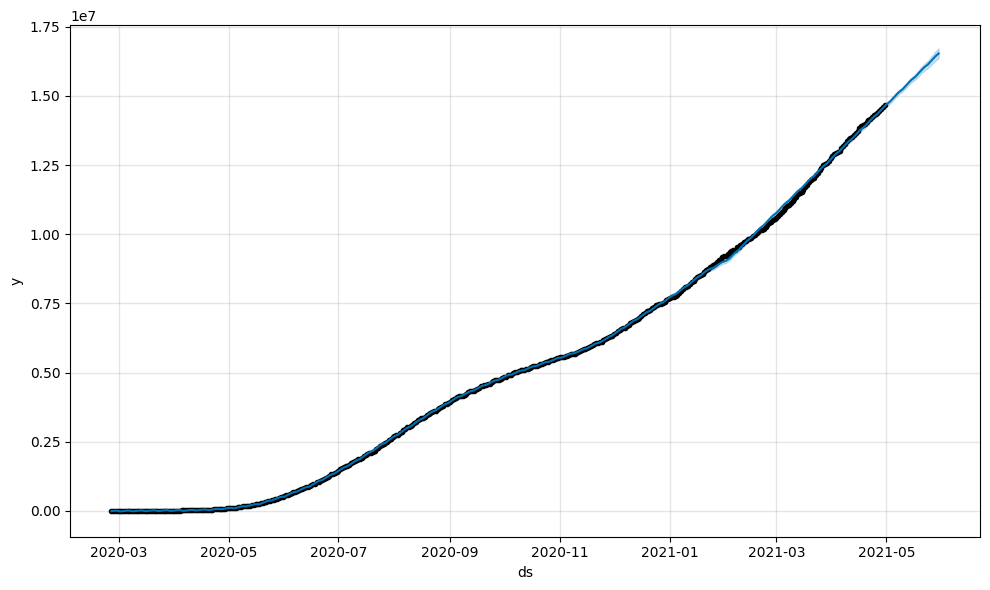

In [40]:
# plotando o gráfico de previsão
modelo.plot(previsao)

data_previsao =previsao[['ds', 'yhat']]
df_previsao = data_previsao.merge(teste_prophet, how='inner', on='ds')

In [41]:
# Calculando o erro MAPE

y_true = df_previsao['y']
y_pred = df_previsao['yhat']
mean_absolute_percentage_error(y_true, y_pred)

0.000806002654036175

In [42]:
# Recriando o modelo
modelo = Prophet()

# Ajustando o modelo aos dados
modelo.fit(prophet_teste_treino)

# Criando dataframe com os períodos futuros para as previsões, vamos fazer a previsão para os próximos 30 dias
futuro = modelo.make_future_dataframe(periods= 30, freq = '1d')

# Realizando as previsões
previsao= modelo.predict(futuro)

# Agora podemos ver a nossa previsão
previsao.head()

09:24:45 - cmdstanpy - INFO - Chain [1] start processing
09:24:45 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-26,-4504.817884,-48164.582642,35880.554042,-4504.817884,-4504.817884,-2381.515789,-2381.515789,-2381.515789,-2381.515789,-2381.515789,-2381.515789,0.0,0.0,0.0,-6886.333673
1,2020-02-27,-4211.757910,-41031.212188,44442.014594,-4211.757910,-4211.757910,5425.705508,5425.705508,5425.705508,5425.705508,5425.705508,5425.705508,0.0,0.0,0.0,1213.947598
2,2020-02-28,-3918.697936,-38045.682294,52553.929929,-3918.697936,-3918.697936,11155.551599,11155.551599,11155.551599,11155.551599,11155.551599,11155.551599,0.0,0.0,0.0,7236.853663
3,2020-02-29,-3625.637962,-34995.804736,52981.147316,-3625.637962,-3625.637962,12664.112598,12664.112598,12664.112598,12664.112598,12664.112598,12664.112598,0.0,0.0,0.0,9038.474636
4,2020-03-01,-3332.577988,-46685.409089,39787.412724,-3332.577988,-3332.577988,589.115813,589.115813,589.115813,589.115813,589.115813,589.115813,0.0,0.0,0.0,-2743.462176


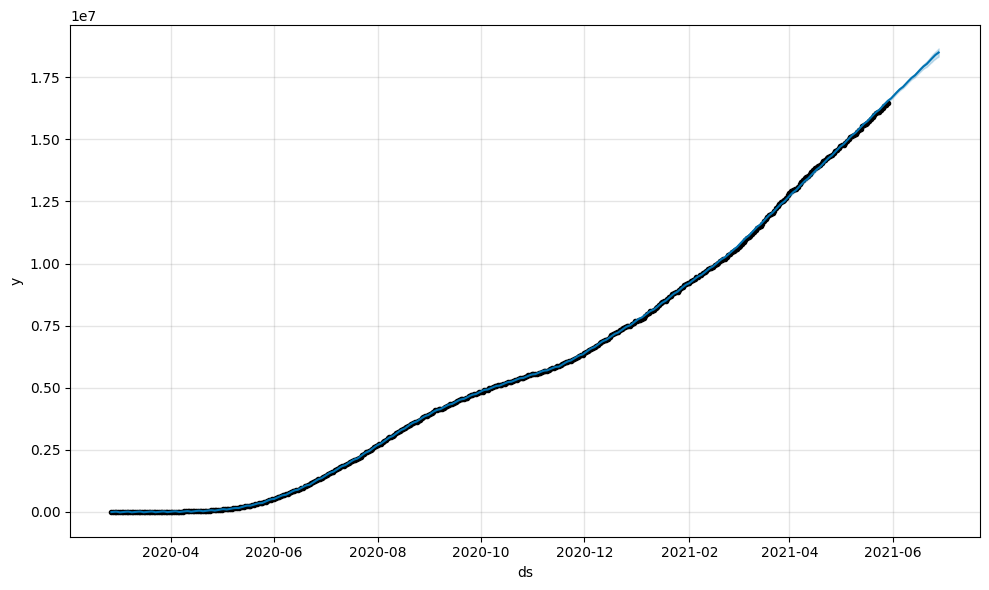

In [43]:
# plotando o gráfico de previsão
modelo.plot(previsao)

data_previsao =previsao[['ds', 'yhat']]
df_previsao = data_previsao.merge(teste_prophet, how='inner', on='ds')

In [44]:
data_previsao.tail(31)


,ds,yhat
458,2021-05-29,1.655067e+07
459,2021-05-30,1.660445e+07
460,2021-05-31,1.665337e+07
461,2021-06-01,1.672446e+07
462,2021-06-02,1.679904e+07
463,2021-06-03,1.687271e+07
464,2021-06-04,1.694429e+07
465,2021-06-05,1.701165e+07
466,2021-06-06,1.706543e+07
467,2021-06-07,1.711436e+07


## Prevendo o numero de mortes no proximo mes com ARIMA

In [45]:
# Selecionando apenas coluna Confirmados p/ fazermos previsao de casos confirmados
treino_previsao = treino['Deaths']
teste_previsao = teste['Deaths']
previsao_teste_treino = pd.concat([treino_previsao, teste_previsao], axis=0)

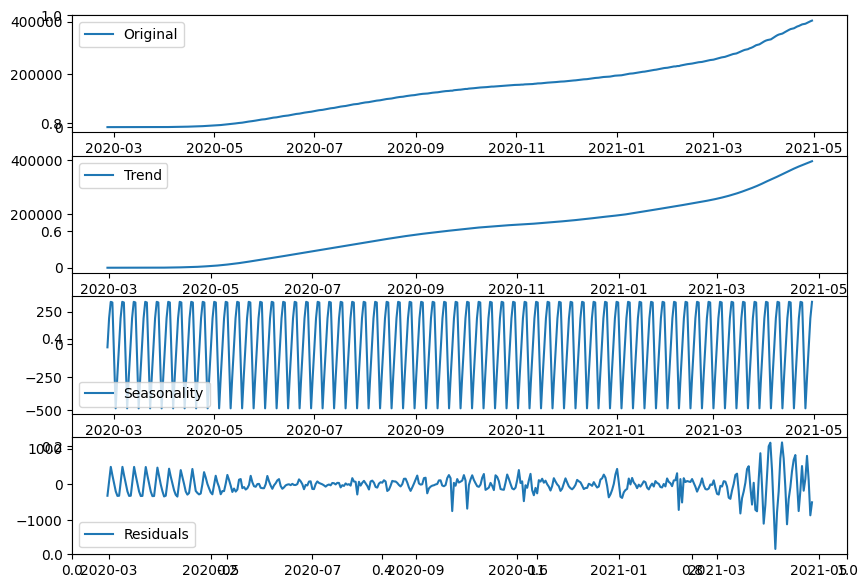

In [ ]:
#  Vamos ver  tendência a sazonalidade e o resíduo dos dados de treino de casos confirmados
decomposition = seasonal_decompose(treino_previsao, model='additive')  

# define os componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plots
plt.subplots(figsize=(10, 7))
plt.subplot(411)
plt.plot(treino_previsao, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

In [47]:
# Aplicando o auto_arima para sabermos os melhores parâmetros
model = auto_arima(treino_previsao,
                   method= 'nm',
                   max_D=2,
                   stepwise=True,
                   maxiter =50,
                   trace=True
                   )

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=6524.540, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6516.918, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=6506.237, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=6429.023, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=6508.221, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=6460.284, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=6510.122, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=6426.894, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=6518.852, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=6510.553, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=6521.644, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=6508.140, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=6513.624, Time=0.11 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 1.069 seconds


In [48]:
# Aplicando os melhores parametros ao modelo
model.fit(treino_previsao)

ARIMA(method='nm', order=(0, 2, 1), scoring_args={}, suppress_warnings=True)

In [49]:
# Fazendo a previsão para os próximos 29 dias que é o dados do mês de maio que temos
previsao=model.predict(n_periods=29)

In [50]:
# Tranformando a previsão em Dataframe
previsao=pd.DataFrame(previsao,index=teste.index, columns=['previsão'])
previsao

,previsão
ObservationDate,
2021-05-01,406456.420941
2021-05-02,409138.188532
2021-05-03,411826.302771
2021-05-04,414520.763659
2021-05-05,417221.571196
2021-05-06,419928.725382
2021-05-07,422642.226216
2021-05-08,425362.073700
2021-05-09,428088.267832


<Figure size 2000x500 with 0 Axes>

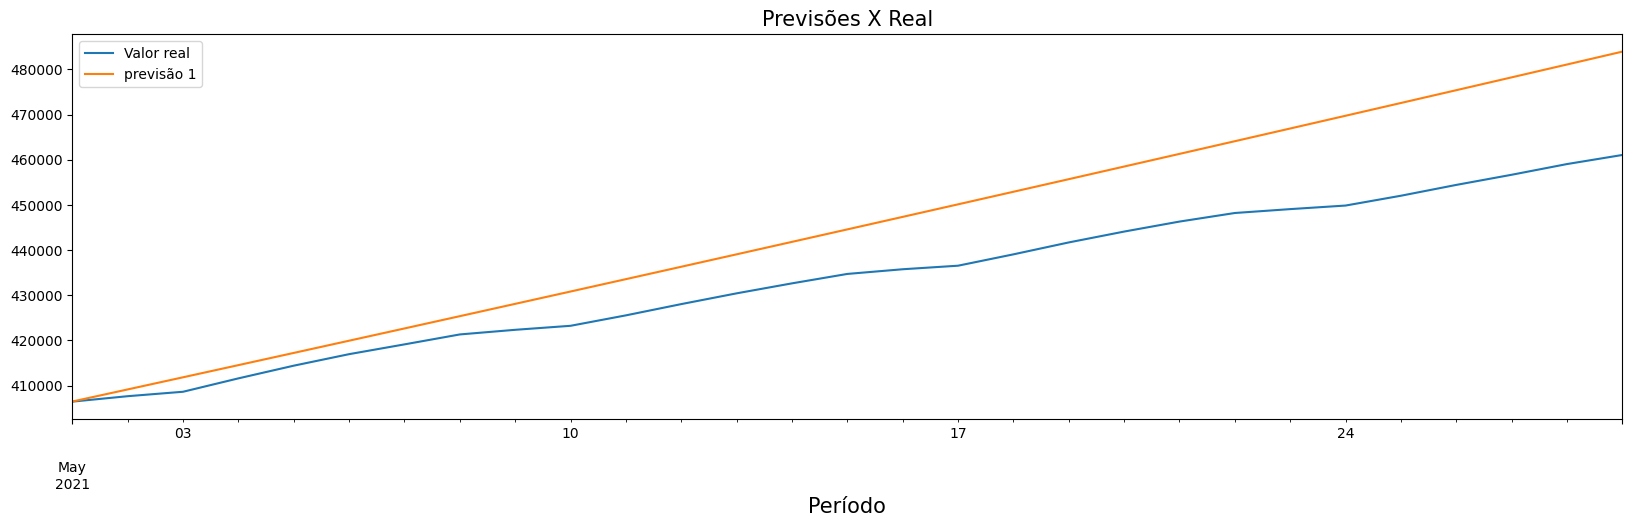

In [51]:
# Vamos vermos no gráfico se o valor encontrado é parecido com o valor real
plt.figure(figsize=(20,5))
pd.concat([teste_previsao,previsao],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.xlabel("Período", size=15)
plt.legend(['Valor real','previsão 1']);

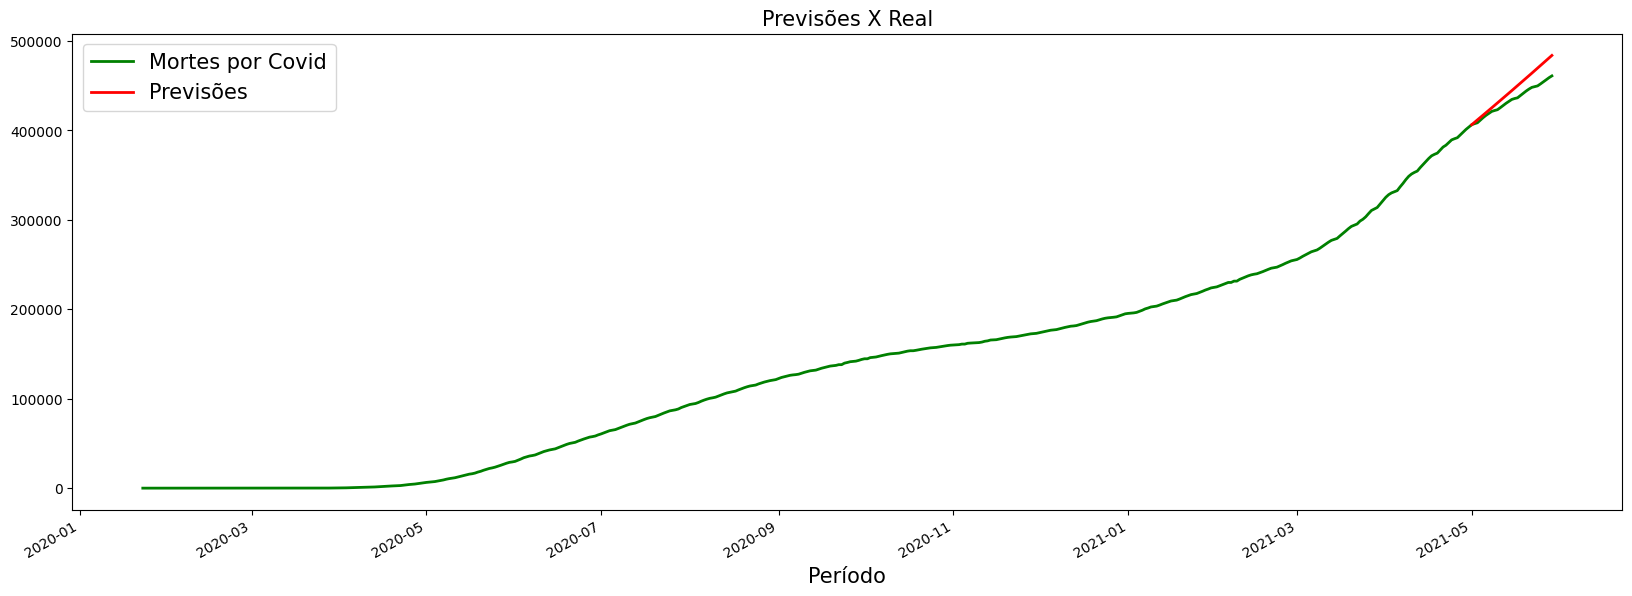

In [52]:
# Olhando para a mesma coisa, mas observando toda a janela de tempo
pd.concat([df_brasil_casos['Deaths'],previsao],
          axis=1).plot(linewidth=2,
                       figsize=(20,7),
                       color=['g','r'])
plt.legend(['Mortes por Covid','Previsões'], fontsize=15)
plt.xlabel('Período', size=15)
plt.title('Previsões X Real',size=15)
plt.show();

In [53]:
# Vemos que o modelo não captou muito bem a previsão, mesmo assim vamos continuar a análise
model.fit(previsao_teste_treino)

previsao2=model.predict(n_periods=33)
previsao2=pd.DataFrame(previsao2, 
                      index=pd.date_range(start='2021-06-01',end='2021-07-01', freq='D'),
                      columns=['nova previsão'])
previsao2

,nova previsão
2021-06-01,467188.567273
2021-06-02,469243.606763
2021-06-03,471304.238121
2021-06-04,473370.461345
2021-06-05,475442.276435
2021-06-06,477519.683393
2021-06-07,479602.682216
2021-06-08,481691.272907
2021-06-09,483785.455464
2021-06-10,485885.229888


<Figure size 2000x500 with 0 Axes>

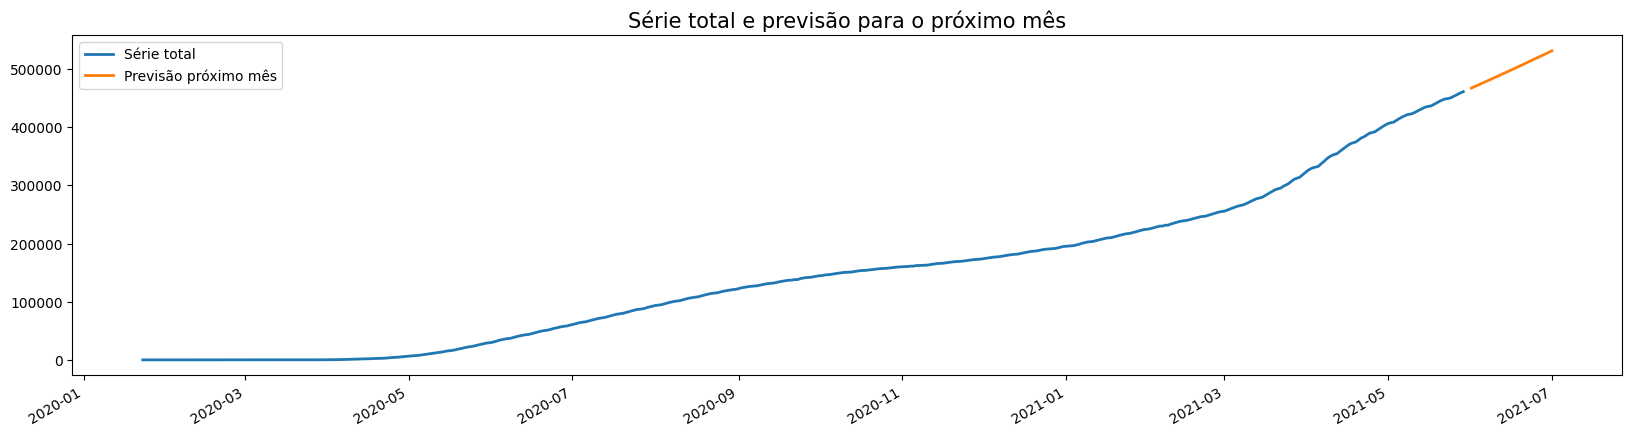

In [54]:
# PLotando o gráfico para vermos a previsão
plt.figure(figsize=(20,5))
pd.concat([df_brasil_casos['Deaths'],previsao2],axis=1).plot(figsize=(20,5), linewidth=2)
plt.xlabel('')
plt.title('Série total e previsão para o próximo mês',size=15)
plt.legend(['Série total','Previsão próximo mês'])
plt.show();